In [1]:
import pandas as pd
import numpy as np
import skfda
import matplotlib.pyplot as plt

/Users/adrianm2/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
!pip install scikit-fda FDApy

In [2]:
import pandas as pd
import numpy as np
import skfda
import matplotlib.pyplot as plt
import FDApy

In [3]:
unemployment = pd.read_csv('us_unemployment.csv')

housing = pd.read_csv("Seasonally Adjusted Housing Price Index.csv")

urban_cpi = pd.read_csv("urban_cpi.csv") #Based on urban consumers

interest_rates = pd.read_csv("fed_funds_rate.csv") 

housing_supply = pd.read_csv("housing_supply.csv")  # ratio of new houses for sale to new houses sold

In [4]:
data_frames = [unemployment, urban_cpi, housing, interest_rates, housing_supply]

merged_HPI = data_frames[0]
for df in data_frames[1:]:
    merged_HPI = pd.merge(merged_HPI, df, on='Month', how='inner')


In [5]:
merged_HPI

,Month,Unemployment Rate,CPI,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central,USA,Fed Funds Effective Rate,Monthly Supply of New Houses
0,1991-01-01,6.4,134.700,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,6.91,9.4
1,1991-02-01,6.6,134.800,100.94,100.63,100.32,98.75,102.38,100.57,100.47,100.45,99.59,100.45,6.25,7.9
2,1991-03-01,6.8,134.800,100.90,100.43,99.82,100.63,101.36,100.13,100.60,100.13,100.49,100.48,6.12,7.3
3,1991-04-01,6.7,135.100,100.97,100.47,99.28,100.38,101.06,100.12,100.40,100.36,100.08,100.33,5.91,7.3
4,1991-05-01,6.9,135.600,101.32,100.76,99.24,100.49,99.85,100.10,100.46,100.32,100.27,100.38,5.78,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,2024-03-01,3.8,312.230,347.84,394.53,378.97,596.00,416.68,464.30,456.82,400.50,422.01,423.15,5.33,8.2
399,2024-04-01,3.9,313.207,348.72,400.12,378.52,596.05,419.57,465.45,459.36,403.22,420.92,424.51,5.33,7.6
400,2024-05-01,4.0,313.225,350.44,398.18,379.14,597.06,419.75,464.82,459.68,401.90,420.38,424.65,5.33,8.4
401,2024-06-01,4.1,313.049,351.29,401.31,378.42,593.27,418.71,463.62,460.59,400.94,420.52,424.66,5.33,8.4


In [ ]:
merged_HPI = merged_HPI.T.drop('Month')


regions = merged_HPI.index

grid_points = np.arange(0,len(merged_HPI.index))
data_matrixSA = merged_HPI.T.to_numpy().astype(np.float64)


data_matrixSA

fdSA = skfda.FDataGrid(data_matrix = data_matrixSA, grid_points = grid_points)


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

fdSA.plot(axes = axes[0])
axes[0].set_title(r"Seasonally Adjuested HPI")
plt.show()

<Figure size 1000x600 with 0 Axes>

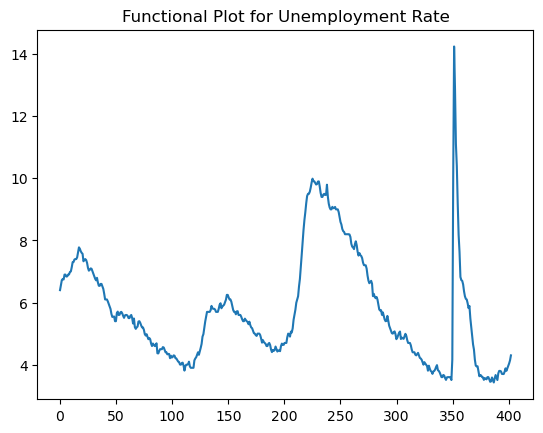

<Figure size 1000x600 with 0 Axes>

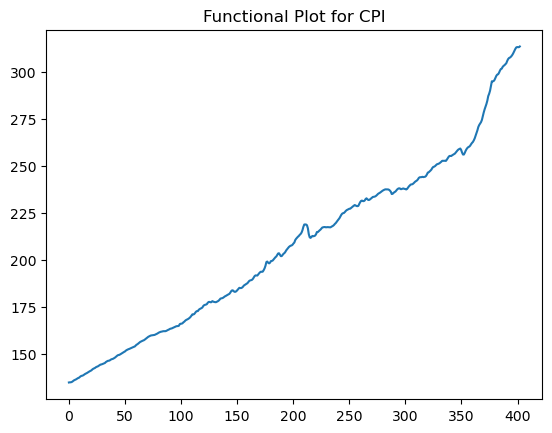

<Figure size 1000x600 with 0 Axes>

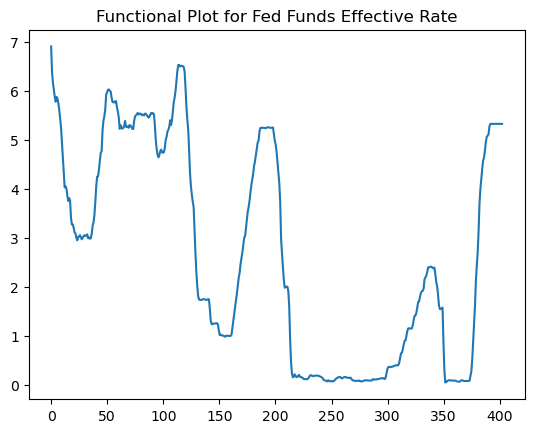

<Figure size 1000x600 with 0 Axes>

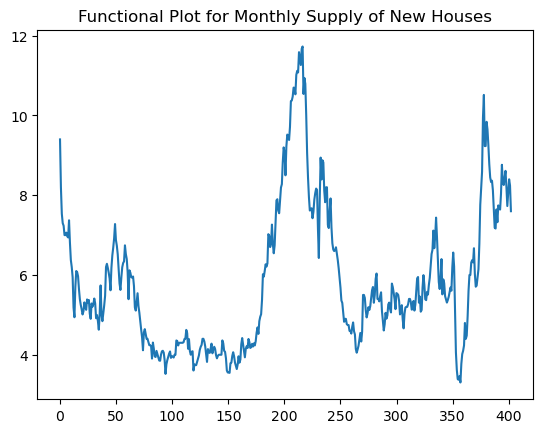

In [7]:
feature_columns = ['Unemployment Rate', 'CPI', 'Fed Funds Effective Rate', 'Monthly Supply of New Houses']

for feature in feature_columns:
    feature_data = merged_HPI[['Month', feature]].set_index('Month')
    
    # Define grid points based on length
    grid_points = np.arange(0, len(feature_data))
    data_matrix_feature = feature_data.to_numpy().astype(np.float64)
    
    # Create the functional data object for the current feature
    fd_feature = skfda.FDataGrid(data_matrix=data_matrix_feature.T, grid_points=grid_points)
    
    fig = plt.figure(figsize=(10, 6))
    fd_feature.plot()
    plt.title(f"Functional Plot for {feature}")
    plt.show()